2023-05-19    939.827126
2023-05-20    938.280809
2023-05-21    936.619368
2023-05-22    934.959677
2023-05-23    933.330502
2023-05-24    931.738120
2023-05-25    930.183226
2023-05-26    928.665214
2023-05-27    927.183225
2023-05-28    925.736378
2023-05-29    924.323822
2023-05-30    922.944734
2023-05-31    921.598314
2023-06-01    920.283786
2023-06-02    919.000393
2023-06-03    917.747397
2023-06-04    916.524079
2023-06-05    915.329734
2023-06-06    914.163676
2023-06-07    913.025237
2023-06-08    911.913760
2023-06-09    910.828609
2023-06-10    909.769158
2023-06-11    908.734801
2023-06-12    907.724941
2023-06-13    906.739000
2023-06-14    905.776410
2023-06-15    904.836619
2023-06-16    903.919086
2023-06-17    903.023285
Freq: D, Name: Lần cuối, dtype: float64


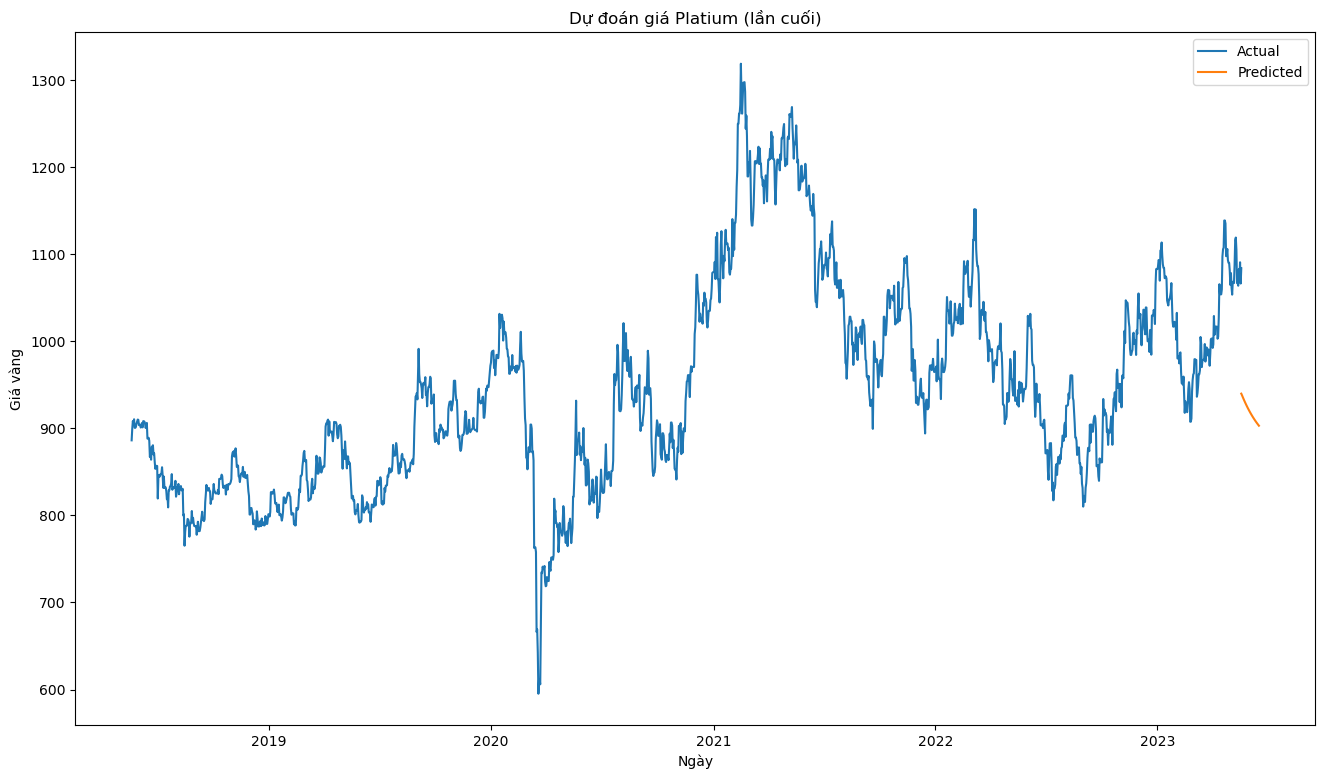

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data_Platium = pd.read_csv("./data/PlatiumData.csv", na_values=['null'], index_col='Ngày', parse_dates=True, infer_datetime_format=True)
data_Platium = data_Platium.drop('KL', axis=1)
data_Platium.dropna(inplace=True)

# Chuyển đổi thành tần suất hàng ngày
data_Platium = data_Platium.resample('D').ffill()

# Chia tập train-test-validate theo tỉ lệ 5:3:2
train_size = int(len(data_Platium) * 0.5)
val_size = int(len(data_Platium) * 0.2)  # 10% dữ liệu cho tập validate
test_size = len(data_Platium) - train_size - val_size

train_data = data_Platium[:train_size].copy()
val_data = data_Platium[train_size:train_size+val_size].copy()
test_data = data_Platium[train_size+val_size:].copy()

# Huấn luyện mô hình VAR trên tập train
model = VAR(train_data)
model_fit = model.fit()

# Dự đoán giá vàng trong 30 ngày tiếp theo
forecast = model_fit.forecast(model_fit.endog, steps=30)
last_date = data_Platium.index[-1]
date_range = pd.date_range(start=last_date, periods=30, freq='D')
predictions = pd.DataFrame(forecast, index=date_range, columns=data_Platium.columns)
predicted_Platium_prices = predictions['Lần cuối']

# In kết quả dự đoán
print(predicted_Platium_prices)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(16, 9))
plt.plot(data_Platium.index, data_Platium['Lần cuối'], label='Actual')
plt.plot(predicted_Platium_prices.index, predicted_Platium_prices, label='Predicted')
plt.title('Dự đoán giá Platium (lần cuối)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()

## Đánh giá mô hình

In [2]:
# Tính toán các chỉ số đánh giá
actual_prices = test_data['Lần cuối']
mae = np.mean(np.abs(predicted_Platium_prices - actual_prices))
rmse = np.sqrt(np.mean((predicted_Platium_prices - actual_prices)**2))
mape = np.mean(np.abs((predicted_Platium_prices - actual_prices) / actual_prices)) * 100

# In kết quả đánh giá
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 143.97287433810664
Root Mean Squared Error (RMSE): 143.97287433810664
Mean Absolute Percentage Error (MAPE): 13.284081411524879
